# FFT

Here is the example taken from the scipy [docs](http://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html). As noted in those docs, FFTW-based packages like [PyFFTW](http://hgomersall.github.io/pyFFTW/index.html) are likely to be significantly faster. So, do that if you'd like.

Here, we'll plot the Fourier Transform of the sum of two sines.

In [1]:
import numpy as np, scipy as sp, matplotlib.pyplot as plt, seaborn as sns
from scipy.fftpack import fft
%matplotlib inline

In [2]:
# Number of points
N = 600
# sample spacing
T = 1.0/800.0
# linspace gives N evenly spaced points between the start and stop values.
x = np.linspace(0.0,N*T,N)
# That returns a numpy array.
print(x[:10]) # here are the first 10 points

[ 0.          0.00125209  0.00250417  0.00375626  0.00500835  0.00626043
  0.00751252  0.00876461  0.01001669  0.01126878]


In [3]:
#Make sure to use the numpy sin, cos, etc.
# functions to work with numpy arrays. The ones built into python's "math"
# library are only meant for one point at a time, rather than an array.

# numpy also has constants like "pi"
y = np.sin(50 * 2 * np.pi * x) + 0.5*np.sin(80*2*np.pi*x)
print(y[:10]) # again, first 10 points, just to check

[ 0.          0.67760581  1.18388467  1.39967009  1.29218938  0.9199978
  0.40788725 -0.09821032 -0.47945967 -0.67818874]


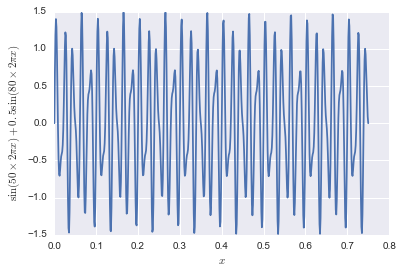

In [4]:
plt.plot(x,y)
plt.xlabel('$x$')
plt.ylabel('$\sin(50 \\times 2 \pi x) + 0.5\sin(80\\times 2\pi x)$')

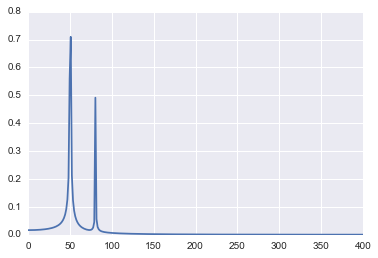

In [5]:
# Now take the FFT
yf = fft(y)
# You should understand the spacing here. 
# As far as why you only want half of the points, see the documentation.
# No, really, see the documentation. Maybe even `fftshift`.
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
# Question for you: what should the axis labels be?

## Reading data from audio files

For this, I recommend `scipy.io.wavfile.read`. You can find documentation [here](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.io.wavfile.read.html). You'll need to download a wav file. Below, I use the classic terminator line, downloaded from [here](http://www.wavsource.com/snds_2016-04-17_2152604536530364/movies/terminator/t1_be_back.wav).

In [6]:
from scipy.io import wavfile

In [7]:
rate, data = wavfile.read('/Users/mglerner/tmp/t1_be_back.wav')

/Users/mglerner/anaconda/envs/py3/lib/python3.5/site-packages/scipy/io/wavfile.py:221: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [8]:
print(rate)

11025


In [9]:
print(data)

[129 129 130 ..., 126 128 133]


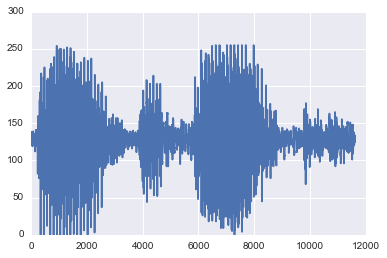

In [10]:
# you'll have to read the docs to figure out what `rate` is, 
# but here's me plotting the signal directly.
plt.plot(data)

## Spectrogram

You may want a spectrogram, to show how a signal evolves over time. For that, I've copied the matplotlib [specgram example](http://matplotlib.org/examples/pylab_examples/specgram_demo.html). 

You do **NOT** need to do this. Instead, you can just take the FFT (or wavelet transform) and look at the results.

It does some things you may not quite understand to make the signal, but the short version is that you can clearly see two different functions, and the result of taking the FFT of those. You don't need to worry about how the signals are constructed, because you'll be taking yours from an audio file.

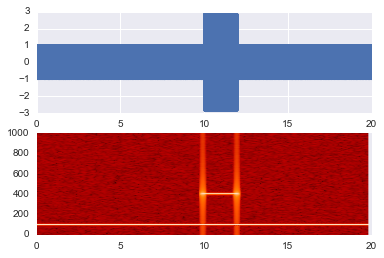

In [11]:
dt = 0.0005
t = np.arange(0.0, 20.0, dt)
s1 = np.sin(2*np.pi*100*t)
s2 = 2*np.sin(2*np.pi*400*t)

# create a transient "chirp"
mask = np.where(np.logical_and(t > 10, t < 12), 1.0, 0.0)
s2 = s2 * mask

# add some noise into the mix
nse = 0.01*np.random.random(size=len(t))

x = s1 + s2 + nse  # the signal
NFFT = 1024       # the length of the windowing segments
Fs = int(1.0/dt)  # the sampling frequency

# Pxx is the segments x freqs array of instantaneous power, freqs is
# the frequency vector, bins are the centers of the time bins in which
# the power is computed, and im is the matplotlib.image.AxesImage
# instance

ax1 = plt.subplot(211)
plt.plot(t, x)
plt.subplot(212, sharex=ax1)
Pxx, freqs, bins, im = plt.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=900,
                                cmap=plt.cm.gist_heat)
plt.grid(False) # Hard to interpret with the grid on. 